# Create RiverFlood Hazard object from netCDF file

In [143]:
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
import pandas as pd

In [223]:
# Choices
val = 10000
lon = 1.25
lat = 49.25
loc_bounds = (1,48,4,50) #lon_min, lat_min, lon_max, lat_max
myloc = Centroids.from_pnt_bounds(loc_bounds, res=0.01, crs='EPSG:4326')
#n_country = ['BRA']
n_year_hist = range(1965,1970)
n_year_fut = range(2065,2070)
#hist: 1861 to 2006 (0 to 145)
#others: 2006 to 2100 (0 to 94)

In [109]:
# RiverFlood hazard file source
dph_choice = ['../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85
frc_choice = ['../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85

In [110]:
# generating RiverFlood hazard from netCDF file
rf_hist = RiverFlood.from_nc(centroids = myloc, years=n_year_hist, dph_path=dph_choice[0], frc_path=frc_choice[0])
rf_rcp26 = RiverFlood.from_nc(centroids = myloc, years=n_year_fut, dph_path=dph_choice[1], frc_path=frc_choice[1])
rf_rcp60 = RiverFlood.from_nc(centroids = myloc, years=n_year_fut, dph_path=dph_choice[2], frc_path=frc_choice[2])
rf_rcp85 = RiverFlood.from_nc(centroids = myloc, years=n_year_fut, dph_path=dph_choice[3], frc_path=frc_choice[3])
rf_hist.event_name 


['1965', '1966', '1967', '1968', '1969']

<GeoAxes: title={'center': 'RF max intensity at each point'}>

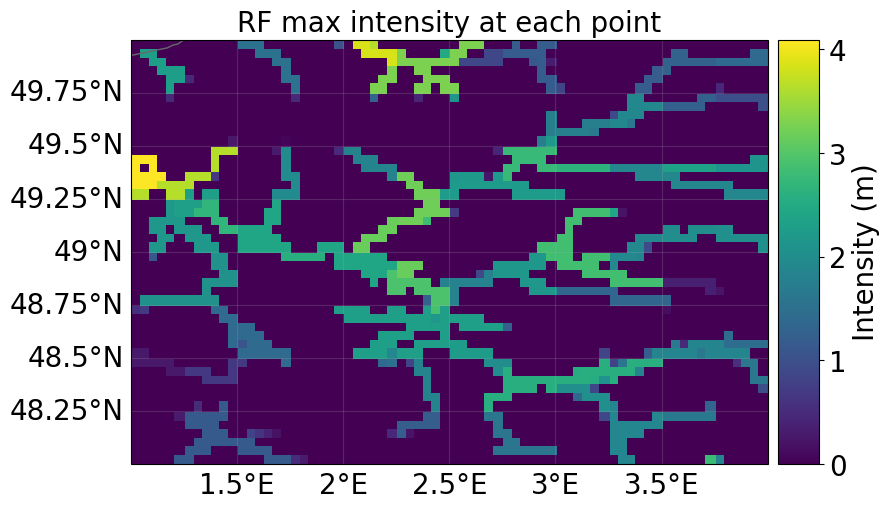

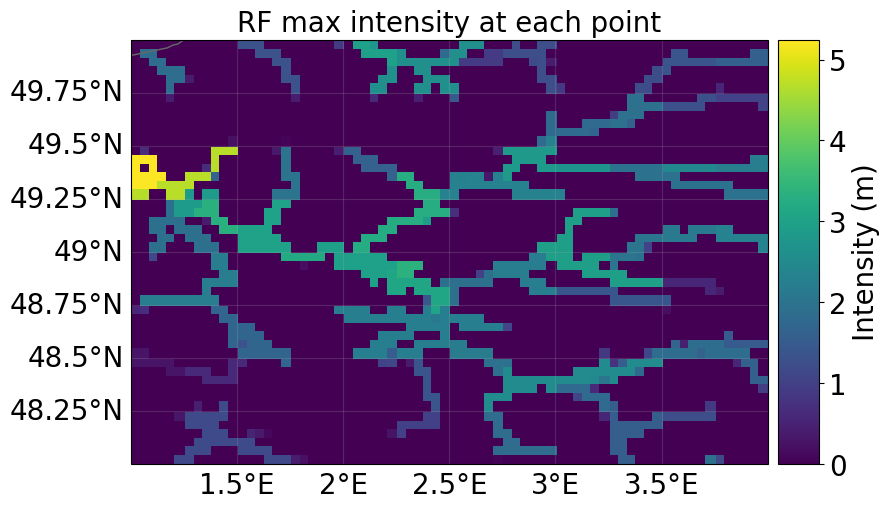

In [111]:
# plotting intensity (Flood depth in m)
#rf_hist.plot_intensity(event=0, smooth = False) 
rf_rcp26.plot_intensity(event=0, smooth = False) 
#rf_rcp60.plot_intensity(event=0, smooth = False)  
rf_rcp85.plot_intensity(event=0, smooth = False) 
#event 0 is the max over the selected years

<GeoAxes: title={'center': 'RF max intensity at each point'}>

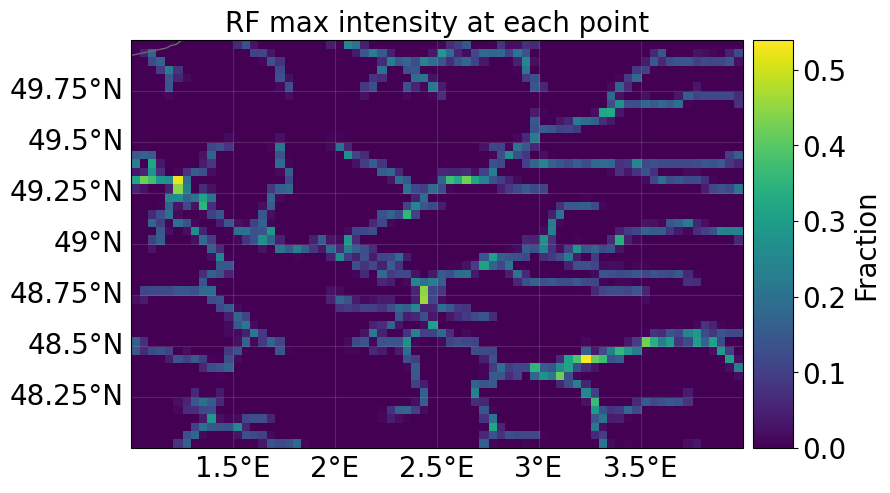

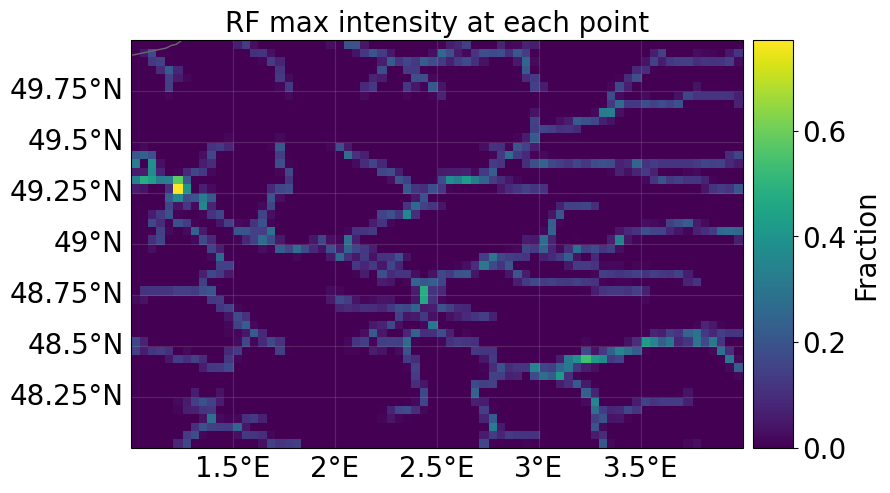

In [112]:
# plotting fraction flooded
#rf_hist.plot_fraction(event=0, smooth = False)
rf_rcp26.plot_fraction(event=0, smooth = False)
#rf_rcp60.plot_fraction(event=0, smooth = False)
rf_rcp85.plot_fraction(event=0, smooth = False)
#event 0 is the max over the selected years

In [114]:
# calculating flooded area
#rf_hist.set_flooded_area()
rf_rcp26.set_flooded_area()
#rf_rcp60.set_flooded_area()
rf_rcp85.set_flooded_area()

#print("Total flooded area with hist scenario in " + str(n_year_hist[0]) + " in " + n_country[0] + ":")
#print(str(rf_hist.fla_annual[0]) + " m2")

print("Total flooded area with rcp26 scenario in " + str(n_year_fut[4]) + " in lon " + str(loc_bounds[0]) + " and lat " + str(loc_bounds[1]) + ":")
print(str(rf_rcp26.fla_annual[4]) + " m2")

#print("Total flooded area with rcp60 scenario in " + str(n_year_fut[0]) + " in " + n_country[0] + ":")
#print(str(rf_rcp60.fla_annual[0]) + " m2")

print("Total flooded area with rcp85 scenario in " + str(n_year_fut[4]) + " in lon " + str(loc_bounds[0]) + " and lat " + str(loc_bounds[1]) + ":")
print(str(rf_rcp85.fla_annual[4]) + " m2")

Total flooded area with rcp26 scenario in 2069 in lon 1 and lat 48:
1464402491.6317623 m2
Total flooded area with rcp85 scenario in 2069 in lon 1 and lat 48:
1561150762.7948358 m2


# Deriving flood impact with hazard, impact function and exposure 

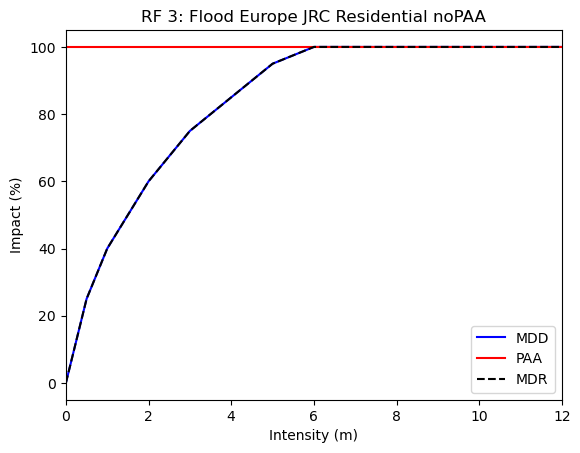

In [219]:
# setting JRC damage functions
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_reg = impf_set.get_func(fun_id=3)
axes = impf_reg[0].plot()

In [225]:
# create exposure object
from climada.entity.exposures.base import Exposures
from geopandas import GeoDataFrame
exp_test = Exposures()
d = {'value': [val], 'latitude': [lat], 'longitude': [lon], 'impf_': [3]}
exp_test.gdf = GeoDataFrame(d)
#print(exp_test.vars_oblig)
#print(exp_test.__dict__)
#print(dir(exp_test))
print(exp_test.gdf)

   value  latitude  longitude  impf_
0  10000     49.25       1.25      3


In [227]:
# compute impact
from climada.engine import Impact

imp_rcp26=Impact()
imp_rcp26.calc(exp_test,impf_set,rf_rcp26,save_mat=True)
print(imp_rcp26.eai_exp)
imp_rcp85=Impact()
imp_rcp85.calc(exp_test,impf_set,rf_rcp85,save_mat=True)
print(imp_rcp85.eai_exp)

2024-04-02 17:34:33,937 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
[2497.6146675]
2024-04-02 17:34:33,953 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
[3076.70242027]
